In [1]:
import pandas as pd
import numpy as np
import random
import math
from copy import deepcopy
import random
import matplotlib.pyplot as plt

In [2]:
def distance(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [3]:
data_frame = pd.read_csv('../Assignment-1/overdoses.csv', delimiter = ',')

data_frame['Population'] = data_frame['Population'].str.replace(',', '')
data_frame['Deaths'] = data_frame['Deaths'].str.replace(',', '')
data_frame[data_frame.columns[1:3]] = data_frame[data_frame.columns[1:3]].astype(float)

population_deaths_data = data_frame[['Population', 'Deaths']]

In [51]:
final = []
for k in range(2,16):
    max_itr = 100
    clusters = {}
    centroids = np.zeros((k,population_deaths_data.shape[1]))
    C_index = random.sample(range(population_deaths_data.shape[0]), k)
    C = population_deaths_data.values[C_index, :]
    _c = np.zeros(C.shape)

    itr = 0
    while(distance(C,_c, None) > 0.0001):
        for i in range(k):
            clusters[i] = []

        if itr == max_itr:
            break

        for i in range(population_deaths_data.shape[0]):
            assigned_cluster = np.argmin(distance(population_deaths_data.values[i,:], C))
            clusters[assigned_cluster].append(i)

        _c = deepcopy(C)

        for i in range(k):
            C[i] = np.mean(population_deaths_data.values[clusters[i]], axis = 0)

        itr += 1
#     print(C)

    '''
    Calculating Objective Function
    '''
    L = 0
    for i in range(k):
        temp_data = population_deaths_data.values[clusters[i], :]
#         print(temp_data.shape)
        for j in range(temp_data.shape[0]):
            L += math.pow(distance(temp_data[j], C[i], ax=0),2)
    final.append(L)

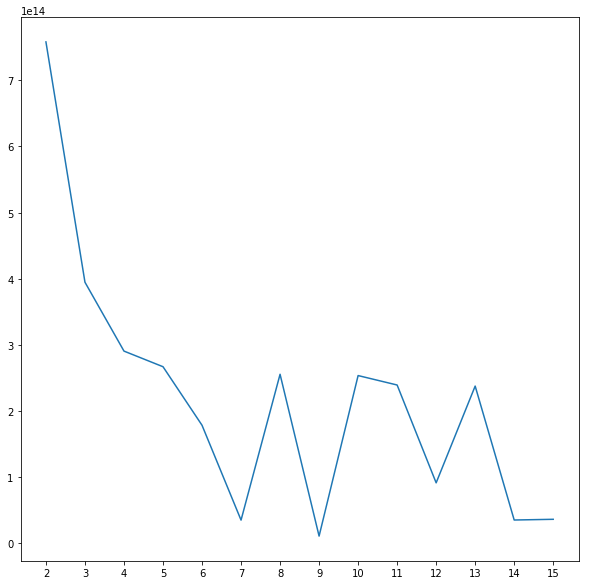

In [52]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(2,16,1), final)
plt.xticks(np.arange(2,16,1))
plt.show()

In [6]:
final

[758191953007749.0,
 387646740549011.5,
 290288478673405.75,
 180602527594782.88,
 105137064812311.95,
 263652429789914.7,
 254963207682097.5,
 92830187220087.33,
 847573615708198.2,
 254349262333957.6,
 251985217123067.12,
 239257343557208.44,
 238118647924281.44,
 35120155951536.09]